In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [2]:
df=pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [5]:
df.shape

(142193, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [7]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [9]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [10]:
df1=df.drop(columns=['Date','Location','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','RainToday','RainTomorrow','WindSpeed3pm','WindSpeed9am','Cloud9am','Cloud3pm'])

In [11]:
df1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM
0,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0
1,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0
2,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0
3,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,18.1,26.5,1.0
4,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,17.8,29.7,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,NaN,NaN,59.0,27.0,1024.7,1021.2,9.4,20.9,0.0
142189,2.8,23.4,0.0,NaN,NaN,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0
142190,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0
142191,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0


<Axes: >

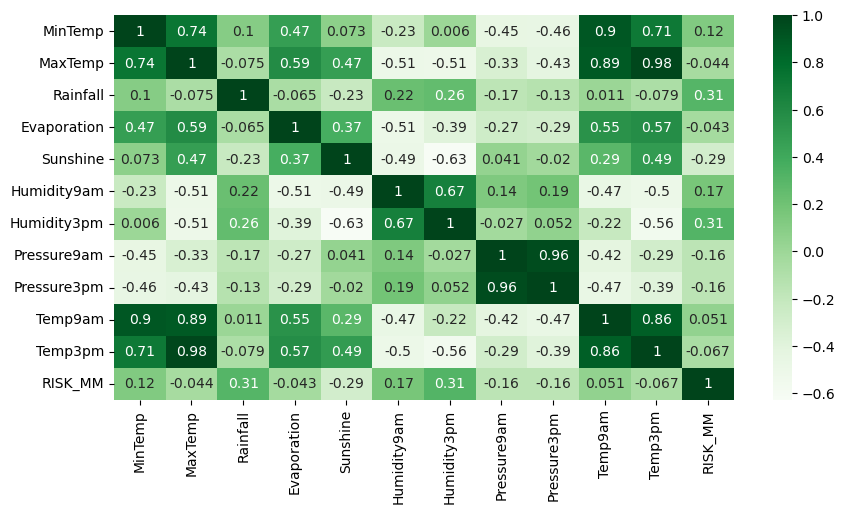

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),annot=True,cmap='Greens')

In [13]:
df1.isnull().sum()

MinTemp          637
MaxTemp          322
Rainfall        1406
Evaporation    60843
Sunshine       67816
Humidity9am     1774
Humidity3pm     3610
Pressure9am    14014
Pressure3pm    13981
Temp9am          904
Temp3pm         2726
RISK_MM            0
dtype: int64

In [14]:
df1['MinTemp']=df1['MinTemp'].fillna(df1['MinTemp'].mean())
df1['MaxTemp']=df1['MaxTemp'].fillna(df1['MaxTemp'].mean())
df1['Rainfall']=df1['Rainfall'].fillna(df1['Rainfall'].mean())
df1['Evaporation']=df1['Evaporation'].fillna(df1['Evaporation'].mean())
df1['Sunshine']=df1['Sunshine'].fillna(df1['Sunshine'].mean())
df1['Humidity9am']=df1['Humidity9am'].fillna(df1['Humidity9am'].mean())
df1['Humidity3pm']=df1['Humidity3pm'].fillna(df1['Humidity3pm'].mean())
df1['Pressure9am']=df1['Pressure9am'].fillna(df1['Pressure9am'].mean())
df1['Pressure3pm']=df1['Pressure3pm'].fillna(df1['Pressure3pm'].mean())
df1['Temp9am']=df1['Temp9am'].fillna(df1['Temp9am'].mean())
df1['Temp3pm']=df1['Temp3pm'].fillna(df1['Temp3pm'].mean())
df1['RISK_MM']=df1['RISK_MM'].fillna(df1['RISK_MM'].mean())

In [15]:
df1.isnull().sum()

MinTemp        0
MaxTemp        0
Rainfall       0
Evaporation    0
Sunshine       0
Humidity9am    0
Humidity3pm    0
Pressure9am    0
Pressure3pm    0
Temp9am        0
Temp3pm        0
RISK_MM        0
dtype: int64

In [16]:
le=LabelEncoder()
for column in df.columns:
    if df[column].dtype=='object':
        df[column]=le.fit_transform(df[column])

In [17]:
df1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM
0,13.4,22.9,0.6,5.469824,7.624853,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0
1,7.4,25.1,0.0,5.469824,7.624853,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0
2,12.9,25.7,0.0,5.469824,7.624853,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0
3,9.2,28.0,0.0,5.469824,7.624853,45.0,16.0,1017.6,1012.8,18.1,26.5,1.0
4,17.5,32.3,1.0,5.469824,7.624853,82.0,33.0,1010.8,1006.0,17.8,29.7,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,5.469824,7.624853,59.0,27.0,1024.7,1021.2,9.4,20.9,0.0
142189,2.8,23.4,0.0,5.469824,7.624853,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0
142190,3.6,25.3,0.0,5.469824,7.624853,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0
142191,5.4,26.9,0.0,5.469824,7.624853,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0


In [18]:
X=df1.drop(columns='MaxTemp')
Y=df1['MaxTemp']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [19]:
model1=LinearRegression()
model1.fit(X_train,Y_train)

LinearRegression()

In [20]:
Y_pred=model1.predict(X_test)
Y_pred

array([12.81341525, 18.44112884, 23.35392084, ..., 23.92882655,
       21.31408278, 19.83511712])

In [21]:
mse=mean_squared_error(Y_test,Y_pred)
mse

2.3311252961129356

In [22]:
 r2_error=r2_score(Y_test,Y_pred)
r2_error

0.9538681415629865

In [23]:
rss=np.sum(np.square(Y_test-Y_pred))
rss

66294.87229615578

In [24]:
model2=DecisionTreeRegressor()
model2.fit(X_train,Y_train)

DecisionTreeRegressor()

In [25]:
Y_pred2=model2.predict(X_test)
Y_pred2

array([13.2, 18. , 23.1, ..., 22.7, 20.5, 20. ])

In [26]:
mse2=mean_squared_error(Y_test,Y_pred2)
mse2

2.1832934482451103

In [27]:
 r2_error2=r2_score(Y_test,Y_pred2)
r2_error2

0.9567936633655649

In [28]:
rss2=np.sum(np.square(Y_test-Y_pred2))
rss2

62090.68237464269

In [29]:
model3=SVR()
model3.fit(X_train,Y_train)

SVR()

In [30]:
Y_pred3=model3.predict(X_test)
Y_pred3

array([12.9961586 , 18.55267805, 23.94216288, ..., 24.11506135,
       22.216134  , 20.09679046])

In [31]:
mse3=mean_squared_error(Y_test,Y_pred3)
mse3

3.9269900476354445

In [32]:
mae3=mean_absolute_error(Y_test,Y_pred3)
mae3

1.4328169222060299

In [33]:
r2_error3=r2_score(Y_test,Y_pred3)
r2_error3

0.922286738828172

In [63]:
model4=RandomForestRegressor()
model4.fit(X_train,y_train)

NameError: name 'y_train' is not defined

In [ ]:
Y_pred4=model4.predict(X_test)
Y_pred4

In [ ]:
mse=mean_squared_error(Y_test,Y_pred4)
mae=mean_absolute_error(Y_test,Y_pred4)
r2_score=r2_score(Y_test,Y_pred4)
print('mean_squared_error:',mse)
print('mean_absolute_error:',mae)
print('r2_score:',r2_score)

In [ ]:
model5=AdaBoostRegressor()
model5.fit(X_train,y_train)

In [ ]:
y_pred5=model5.predict(X_test)
y_pred5